In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [26]:
df=pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].dropna()
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
885,0,3,female,39.0,29.1250
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
889,1,1,male,26.0,30.0000


In [31]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500
...,...,...,...,...,...
885,0,3,1,39.0,29.1250
886,0,2,0,27.0,13.0000
887,1,1,1,19.0,30.0000
889,1,1,0,26.0,30.0000


In [33]:
X = df[['Pclass', 'Sex', 'Age', 'Fare']].values
y = df['Survived'].values.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

In [37]:
np.random.seed(42)
weights = np.random.randn(X_train.shape[1], 1)
bias = 0
lr = 0.1
epochs = 100

loss_history = []

for i in range(epochs):
    z = np.dot(X_train, weights) + bias
    y_pred = sigmoid(z)
    loss = binary_cross_entropy(y_train, y_pred)

    dw = np.dot(X_train.T, (y_pred - y_train)) / X_train.shape[0]
    db = np.mean(y_pred - y_train)

    weights -= lr * dw
    bias -= lr * db

    loss_history.append(loss)

    if i % 10 == 0:
        print(f"Epoch {i}: Loss = {loss:.4f}")

Epoch 0: Loss = 0.8129
Epoch 10: Loss = 0.7051
Epoch 20: Loss = 0.6368
Epoch 30: Loss = 0.5931
Epoch 40: Loss = 0.5645
Epoch 50: Loss = 0.5448
Epoch 60: Loss = 0.5307
Epoch 70: Loss = 0.5201
Epoch 80: Loss = 0.5119
Epoch 90: Loss = 0.5053


In [39]:
y_test_pred = sigmoid(np.dot(X_test, weights) + bias)
y_test_pred_labels = (y_test_pred > 0.5).astype(int)

accuracy = np.mean(y_test_pred_labels == y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 74.83%


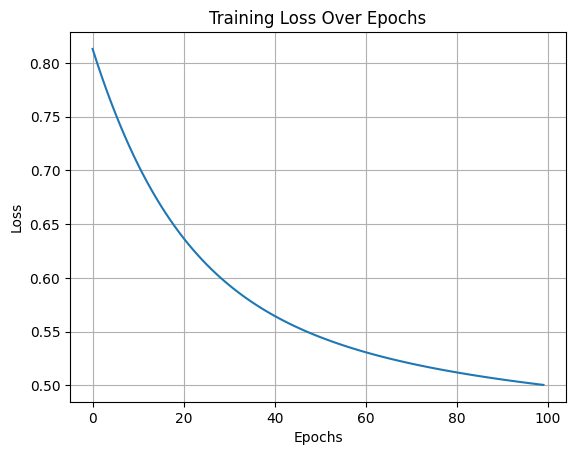

In [42]:
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.show()